## DA_WEEK6_REVIEW_박보영

In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

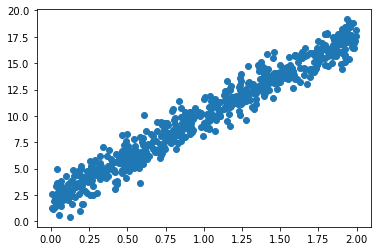

In [31]:
np.random.seed(0)
X=2*np.random.rand(600,1)
y=2+8*X+np.random.randn(600,1)
plt.scatter(X,y)

In [32]:
def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
    N=len(y)
    w1_update=np.zeros_like(w1)
    w0_update=np.zeros_like(w0)
    y_pred=np.dot(X,w1.T)+w0
    diff=y-y_pred
    
    w0_factors=np.ones((N,1))
    w1_update=-(2/N)*learning_rate*(np.dot(X.T,diff))
    w0_update=-(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    
    return w1_update,w0_update

In [33]:
#경사하강법
def gradient_descent_steps(X,y,iters=10000):
    w0=np.zeros((1,1))
    w1=np.zeros((1,1))
    for ind in range(iters):
        w1_update,w0_update=get_weight_updates(w1,w0,X,y,learning_rate=0.01)
        w1=w1-w1_update
        w0=w0-w0_update
    
    return w1,w0

In [34]:
def get_cost(y,y_pred):
    N=len(y)
    cost=np.sum(np.square(y-y_pred))/N
    return cost

w1,w0=gradient_descent_steps(X,y,iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred=w1[0,0]*X+w0
print('Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y,y_pred)))

w1:7.758 w0:2.215
Gradient Descent Total Cost: 0.9765


In [35]:
#미니 배치 확률적 경사 하강법
def stochastic_gradient_descent_steps(X,y,batch_size=10, iters=1000):
    w0=np.zeros((1,1))
    w1=np.zeros((1,1))
    prev_cost=100000
    iter_index=0
    
    for ind in range(iters):
        np.random.seed(ind)
        stochastic_random_index=np.random.permutation(X.shape[0])
        sample_X=X[stochastic_random_index[0:batch_size]]
        sample_y=y[stochastic_random_index[0:batch_size]]
        w1_update,w0_update=get_weight_updates(w1,w0,sample_X,sample_y,learning_rate=0.1)
        w1=w1-w1_update
        w0=w0-w0_update
    
    return w1,w0

In [36]:
w1,w0=stochastic_gradient_descent_steps(X,y,iters=1000)
print("w1:",round(w1[0,0],3), "w0:",round(w0[0,0],3))
y_pred=w1[0,0]*X+w0
print('stochastic gradient descent total cost: {0:.4f}'.format(get_cost(y,y_pred)))

w1: 7.82 w0: 2.353
stochastic gradient descent total cost: 1.0207


결과

경사하강법의 w2가 2에 더 가깝고
미니배치의 w1이 8에 더 가깝다

요류비용은 경사하강법이 더 좋다

### 영화

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
movie = pd.read_csv('movies_data.csv')

In [39]:
movie.head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083


In [40]:
movie=movie.drop(['title', 'distributor', 'release_time', 'director'],axis=1, inplace=False)


In [41]:
movie.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genre           600 non-null    object 
 1   time            600 non-null    int64  
 2   screening_rat   600 non-null    object 
 3   dir_prev_bfnum  270 non-null    float64
 4   dir_prev_num    600 non-null    int64  
 5   num_staff       600 non-null    int64  
 6   num_actor       600 non-null    int64  
 7   box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 37.6+ KB


In [42]:
movie

,genre,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,액션,96,청소년 관람불가,NaN,0,91,2,23398
1,느와르,130,청소년 관람불가,1161602.50,2,387,3,7072501
2,액션,123,15세 관람가,220775.25,4,343,4,6959083
3,코미디,101,전체 관람가,23894.00,2,20,6,217866
4,코미디,108,15세 관람가,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...
595,드라마,111,청소년 관람불가,3833.00,1,510,7,1475091
596,드라마,127,15세 관람가,496061.00,1,286,6,1716438
597,공포,99,청소년 관람불가,NaN,0,123,4,2475
598,느와르,102,15세 관람가,NaN,0,431,4,2192525


In [43]:
movie.isna().head(3)

,genre,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False


In [44]:
movie['dir_prev_bfnum']=movie['dir_prev_bfnum'].fillna(0)
#결측치 채우기

In [45]:
movie.isna()

,genre,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
595,False,False,False,False,False,False,False,False
596,False,False,False,False,False,False,False,False
597,False,False,False,False,False,False,False,False
598,False,False,False,False,False,False,False,False


In [46]:
numerical=movie.select_dtypes('number').columns

C:\Users\pby02\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pby02\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pby02\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

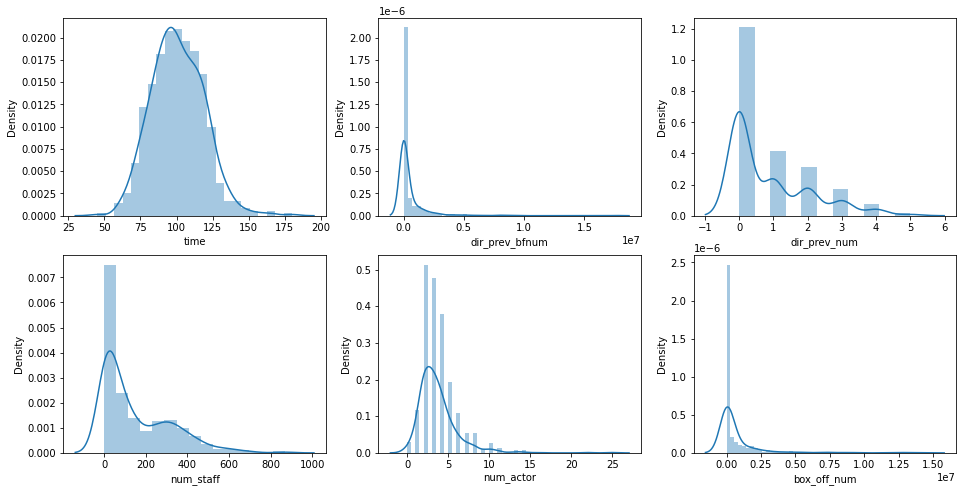

In [47]:
fig,axs=plt.subplots(figsize=(16,8),ncols=3, nrows=2)
for i in range(6):
    row=int(i/3)
    col=i%3
    sns.distplot(movie[numerical[i]], ax=axs[row][col])


dir_prev_num, num_staff, num_off_num 가 왜곡

In [48]:
movie['box_off_num']=np.log1p(movie['box_off_num'])

C:\Users\pby02\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='box_off_num', ylabel='Density'>

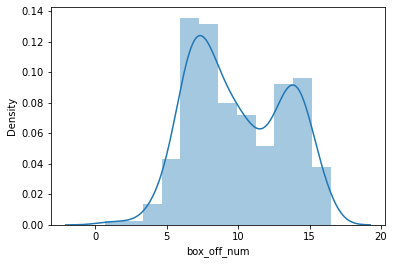

In [49]:
sns.distplot(movie['box_off_num'])

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
y=movie['box_off_num']
features=['time', 'dir_prev_bfnum', 'num_staff']
x=movie[features]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
lr_reg=LinearRegression()
lr_reg.fit(x_train,y_train)
pred=lr_reg.predict(x_test)
mse=mean_squared_error(y_test,pred)
rmse=np.sqrt(mse)
print('mse: {0:.3f}, rmse:{1:.3f}'.format(mse,rmse))
print('variance score:{0:.3f}'.format(r2_score(y_test,pred)))

mse: 4.111, rmse:2.027
variance score:0.628


In [54]:
print('coef: ',lr_reg.coef_)
print('intercept: ',lr_reg.intercept_)

coef:  [3.23122892e-02 5.19618851e-08 1.22862316e-02]
intercept:  4.808278841138571


In [56]:
from sklearn.model_selection import cross_val_score

neg_mse_scores=cross_val_score(lr_reg, x,y, scoring="neg_mean_squared_error", cv=5)
print('mse scores', -1*neg_mse_scores)
rmse_score=np.sqrt(-1*neg_mse_scores)
print('rmse scores', rmse_score)

mse scores [4.12418767 4.71031305 4.65894555 5.17139123 4.57843921]
rmse scores [2.03080961 2.17032556 2.15845907 2.27406931 2.13972877]


In [57]:
numerical=movie.select_dtypes('number').columns
categorical=movie.select_dtypes('object').columns

<AxesSubplot:>

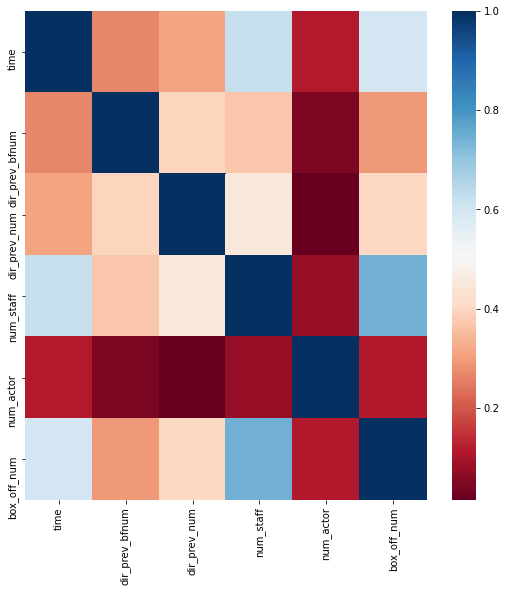

In [59]:
plt.figure(figsize=(9,9))
corr=movie[numerical].corr()
sns.heatmap(corr, cmap='RdBu')

In [63]:
y_movie=movie['box_off_num']
X_movie=movie.drop(['box_off_num'],axis=1, inplace=False)


In [61]:
X_movie.head(3)

,genre,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,액션,96,청소년 관람불가,0.00,0,91,2
1,느와르,130,청소년 관람불가,1161602.50,2,387,3
2,액션,123,15세 관람가,220775.25,4,343,4


In [64]:
y_movie.head(3)

0    10.060449
1    15.771725
2    15.755558
Name: box_off_num, dtype: float64

In [65]:
movie[categorical].describe()

,genre,screening_rat
count,600,600
unique,12,4
top,드라마,청소년 관람불가
freq,221,204


In [73]:
from sklearn.preprocessing import LabelEncoder

for cat in categorical:
    encoder=LabelEncoder()
    encoder.fit(movie[cat])
    labels=encoder.transform(movie[cat])
    movie.drop([cat],axis=1)
    movie[cat]=labels

In [74]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genre           600 non-null    int32  
 1   time            600 non-null    int64  
 2   screening_rat   600 non-null    int32  
 3   dir_prev_bfnum  600 non-null    float64
 4   dir_prev_num    600 non-null    int64  
 5   num_staff       600 non-null    int64  
 6   num_actor       600 non-null    int64  
 7   box_off_num     600 non-null    float64
dtypes: float64(2), int32(2), int64(4)
memory usage: 32.9 KB


In [76]:
y_movie=movie['box_off_num']
X_movie=movie.drop(['box_off_num'],axis=1, inplace=False)


In [77]:
X_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genre           600 non-null    int32  
 1   time            600 non-null    int64  
 2   screening_rat   600 non-null    int32  
 3   dir_prev_bfnum  600 non-null    float64
 4   dir_prev_num    600 non-null    int64  
 5   num_staff       600 non-null    int64  
 6   num_actor       600 non-null    int64  
dtypes: float64(1), int32(2), int64(4)
memory usage: 28.2 KB


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_movie, y_movie, train_size=0.8, test_size=0.2, random_state=123)

In [82]:
X_train.value_counts()

genre  time  screening_rat  dir_prev_bfnum  dir_prev_num  num_staff  num_actor
3      77    1              0.0             0             35         1            2
5      89    3              0.0             0             0          4            2
0      75    3              430920.5        2             6          2            1
5      84    3              0.0             0             44         3            1
       83    3              0.0             0             24         4            1
                                                                                 ..
4      81    3              467697.0        1             34         5            1
       80    3              0.0             0             57         3            1
             2              1200.0          1             53         4            1
             1              0.0             0             51         3            1
11     127   1              819049.5        2             300        8           

릿지

In [83]:
from sklearn.linear_model import Ridge


ridge=Ridge(alpha=10)
neg_mse_scores=cross_val_score(ridge,X_movie,y_movie, scoring="neg_mean_squared_error",cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

print('5 folds 개별 rmse scores:', np.round(rmse_scores,3))
print('5 folds 평균 rmse: {0:.3f}'.format(avg_rmse))

5 folds 개별 rmse scores: [2.12  2.157 2.073 2.184 2.094]
5 folds 평균 rmse: 2.126


In [84]:
alphas = [0 , 0.1 , 1 , 10 , 100]
for alpha in alphas:
    ridge=Ridge(alpha=alpha)
    neg_mse_scores=cross_val_score(ridge, X_movie, y_movie,scoring="neg_mean_squared_error",cv=5)
    avg_rmse=np.mean(np.sqrt(-1*neg_mse_scores))
    print("alpha {0} 5folds avg rmse: {1:.3f}".format(alpha,avg_rmse))

alpha 0 5folds avg rmse: 2.126
alpha 0.1 5folds avg rmse: 2.126
alpha 1 5folds avg rmse: 2.126
alpha 10 5folds avg rmse: 2.126
alpha 100 5folds avg rmse: 2.124


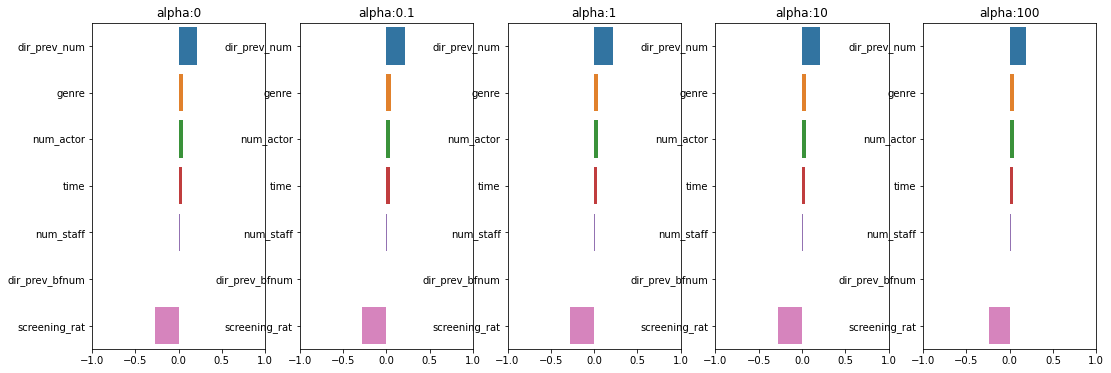

In [93]:
fig,axs=plt.subplots(figsize=(18,6),nrows=1,ncols=5)
coeff_df=pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_movie,y_movie)
    coeff=pd.Series(data=ridge.coef_,index=X_movie.columns)
    colname='alpha:'+str(alpha)
    coeff_df[colname]=coeff
    coeff=coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-1,1)
    sns.barplot(x=coeff.values,y=coeff.index,ax=axs[pos])
    
plt.show()

In [95]:
ridge_alphas=[0,0.1,1,10,100]
sort_column='alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column,ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
dir_prev_num,2.160634e-01,2.160306e-01,2.157357e-01,2.128311e-01,1.875993e-01
genre,4.951502e-02,4.951441e-02,4.950886e-02,4.945307e-02,4.887130e-02
num_actor,4.634393e-02,4.634272e-02,4.633189e-02,4.622398e-02,4.518251e-02
time,3.825985e-02,3.825998e-02,3.826112e-02,3.827236e-02,3.836886e-02
num_staff,1.120740e-02,1.120752e-02,1.120860e-02,1.121924e-02,1.131268e-02
dir_prev_bfnum,-3.245587e-08,-3.244754e-08,-3.237272e-08,-3.163539e-08,-2.520886e-08
screening_rat,-2.772074e-01,-2.771708e-01,-2.768418e-01,-2.735943e-01,-2.448568e-01


라쏘

In [108]:
from sklearn.linear_model import Lasso,ElasticNet

def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True, return_coeff=True):
    coeff_df=pd.DataFrame()
    if verbose:print('#########',model_name,'###########')
    for param in params:
        if model_name=='Ridge': model=Ridge(alpha=param)
        elif model_name=="Lasso": model=Lasso(alpha=param)
        elif model_name=='ElasticNet': model=ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores=cross_val_score(model, X_data_n, y_target_n, scoring="neg_mean_squared_error", cv=5)
        avg_rmse=np.mean(np.sqrt(-1*neg_mse_scores))
        print("alpha {0} 5folds avg rmse: {1:.3f}".format(alpha,avg_rmse))
        model.fit(X_data_n, y_target_n)
        if return_coeff:
            coeff=pd.Series(data=model.coef_, index=X_data_n.columns)
            colname='alpha'+str(param)
            coeff_df[colname]=coeff
            
    return coeff_df

lasso_alphas=[0.07, 0.1,0.5,1,3]
coeff_lasso_df=get_linear_reg_eval('Lasso',params=lasso_alphas, X_data_n=X_movie,y_target_n=y_movie)

######### Lasso ###########
alpha 3 5folds avg rmse: 2.130
alpha 3 5folds avg rmse: 2.133
alpha 3 5folds avg rmse: 2.155
alpha 3 5folds avg rmse: 2.156
alpha 3 5folds avg rmse: 2.165


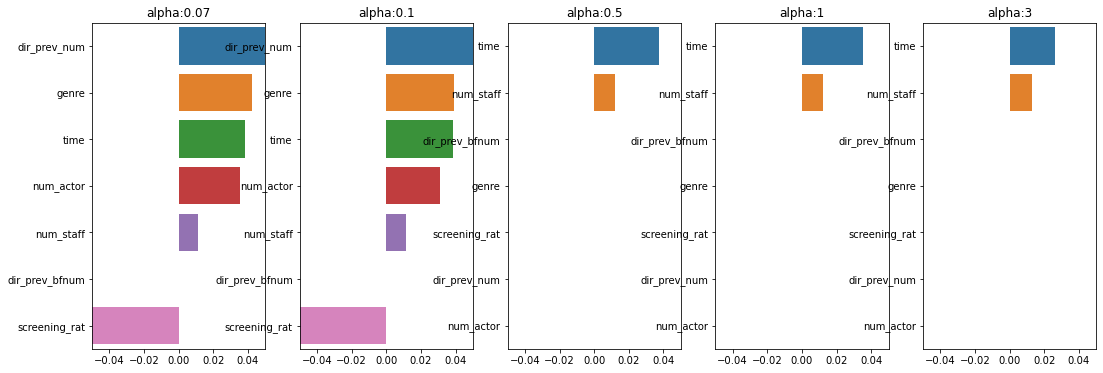

In [103]:
fig,axs=plt.subplots(figsize=(18,6),nrows=1,ncols=5)
coeff_df=pd.DataFrame()

alphas=[0.07, 0.1,0.5,1,3]
for pos, alpha in enumerate(alphas):
    lasso=Lasso(alpha=alpha)
    lasso.fit(X_movie,y_movie)
    coeff=pd.Series(data=lasso.coef_,index=X_movie.columns)
    colname='alpha:'+str(alpha)
    coeff_df[colname]=coeff
    coeff=coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-0.05,0.05)
    sns.barplot(x=coeff.values,y=coeff.index,ax=axs[pos])
    
plt.show()

In [104]:
lasso_alphas=[0.07, 0.1,0.5,1,3]
sort_column='alpha:'+str(lasso_alphas[0])
coeff_df.sort_values(by=sort_column,ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
dir_prev_num,1.509030e-01,1.229741e-01,0.000000e+00,0.000000e+00,0.000000e+00
genre,4.226141e-02,3.915271e-02,0.000000e+00,0.000000e+00,0.000000e+00
time,3.832280e-02,3.834957e-02,3.756934e-02,3.522953e-02,2.587071e-02
num_actor,3.540965e-02,3.072360e-02,0.000000e+00,0.000000e+00,0.000000e+00
num_staff,1.145277e-02,1.155794e-02,1.224377e-02,1.237803e-02,1.291503e-02
dir_prev_bfnum,-1.489141e-08,-7.362938e-09,3.128091e-08,3.360602e-08,4.290977e-08
screening_rat,-2.235372e-01,-2.005355e-01,-0.000000e+00,-0.000000e+00,-0.000000e+00


엘라스틱 넷

In [109]:

elastic_alphas=[0.07,0.1,0.5,1,3]
coeff_elastic_df=get_linear_reg_eval('ElasticNet',params=elastic_alphas,X_data_n=X_movie,y_target_n=y_movie)

######### ElasticNet ###########
alpha 3 5folds avg rmse: 2.128
alpha 3 5folds avg rmse: 2.130
alpha 3 5folds avg rmse: 2.154
alpha 3 5folds avg rmse: 2.155
alpha 3 5folds avg rmse: 2.160


In [111]:
elastic_alphas=[0.07,0.1,0.5,1,3]
sort_column='alpha:'+str(elastic_alphas[0])
coeff_df.sort_values(by=sort_column,ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
dir_prev_num,1.509030e-01,1.229741e-01,0.000000e+00,0.000000e+00,0.000000e+00
genre,4.226141e-02,3.915271e-02,0.000000e+00,0.000000e+00,0.000000e+00
time,3.832280e-02,3.834957e-02,3.756934e-02,3.522953e-02,2.587071e-02
num_actor,3.540965e-02,3.072360e-02,0.000000e+00,0.000000e+00,0.000000e+00
num_staff,1.145277e-02,1.155794e-02,1.224377e-02,1.237803e-02,1.291503e-02
dir_prev_bfnum,-1.489141e-08,-7.362938e-09,3.128091e-08,3.360602e-08,4.290977e-08
screening_rat,-2.235372e-01,-2.005355e-01,-0.000000e+00,-0.000000e+00,-0.000000e+00


회귀트리

In [128]:
def get_model_cv_prediction(model,X_data,y_target):
    neg_mse_scores=cross_val_score(model,X_data,y_target,scoring="neg_mean_squared_error",cv=5)
    rmse_scores=np.sqrt(-1*neg_mse_scores)
    avg_rmse=np.mean(rmse_scores)
    print('#####',model.__class__.__name__, '##########')
    print('5 folds 평균 rmse: {0:.3f}'.format(avg_rmse))

In [130]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

dt_reg=DecisionTreeRegressor(random_state=123,max_depth=4)
ridge_reg=Ridge(alpha=8)
lasso_reg=Lasso(alpha=0.001)

xgb_reg=XGBRegressor(n_estimators=1000)
lgb_reg=LGBMRegressor(n_estimators=1000)

models=[dt_reg,ridge_reg, lasso_reg,xgb_reg,lgb_reg]
for model in models:
    get_model_cv_prediction(model,X_movie,y_movie)

##### DecisionTreeRegressor ##########
5 folds 평균 rmse: 2.131
##### Ridge ##########
5 folds 평균 rmse: 2.126
##### Lasso ##########
5 folds 평균 rmse: 2.126
##### XGBRegressor ##########
5 folds 평균 rmse: 2.160
##### LGBMRegressor ##########
5 folds 평균 rmse: 2.188


In [122]:
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    kf=KFold(n_splits=n_folds, shuffle=True)
    train_fold_pred=np.zeros((X_train_n.shape[0],1))
    test_pred=np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__)
    
    for folder_count, (train_index, valid_index) in enumerate(kf.split(X_train)):
        X_tr=X_train_n[train_index]
        y_tr=y_train_n[train_index]
        X_te=X_train_n[vlid_index]
        
        model.fit(X_tr, y_tr)
        train_fold_pred[valid_index, i]=model.predict(X_tr).reshape(-1,1)
        test_pred[:,folder_counter]=model.predict(X_test_n)
        
    test_pred_mean=np.mean(test_pred, axis=1).reshape(1,1)
    return train_fold_pred, test_pred_mean

In [120]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold

ridge_reg=Ridge(alpha=8)
lasso_reg=Lasso(alpha=0.001)

X_train_n=X_train.values
X_test_n=X_test.values
y_train_n=y_train.values

xgb_reg=XGBRegressor(n_estimators=1000, learning_rate=0.05)
lgb_reg=LGBMRegressor(n_estimators=1000, learnig_rate=0.05)

ridge_train, ridge_test=get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)

lasso_train, lasso_test=get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)

xgb_train, xgb_test=get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)

lgbm_train, lgbm_test=get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)


stack_final_X_train=np.concatenate((ridge_train, lasso_train, xgb_train, lgbm_train),axis=1)
stack_final_X_test=np.concatenate((ridge_test, lasso_test, xgb_test, labm_test),axis=1)

meta_model_ridge=Ridge(alpha=0.1)

meta_model_ridge.fit(stack_final_X_train,y_train)
final=meta_model_ridge.predict(stack_final_X_test)
rmse=np.sqrt(mse)
print('final rmse: ', rmse)

TypeError: Cannot interpret '1' as a data type

In [ ]:
# 오류 이해안됨

파이프

In [136]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler

std=StandardScaler()
ct=make_column_transformer((std, categorical), remainder='passthrough')

model=ElasticNet(alpha=0.1,l1_ratio=0.7, random_state=123)
pipe=make_pipeline(ct,model)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print('r2 score:{0:.3f}'.format(r2_score(y_test,pred)))

r2 score:-0.515


In [141]:
from sklearn.model_selection import GridSearchCV

params={
    'alpha' : [0.1, 0.01, 0.05, 0.07],
'l1_ratio' : [0, 0.5, 0.7, 0.8, 1],
'max_iter' : [10,50,70,100,1000,2000]
}

grid=GridSearchCV(pipe, param_grid=params, scoring='neg_mean_squared_error',cv=5, n_jobs=-1)
grid.fit(X_movie, y_movie)
print('최적 하이퍼 파라미터 {0}, 최적 rmse{1:.3f}'.format(grid.best_params_, grid.best_score_))

ValueError: Invalid parameter alpha for estimator Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  Index(['genre', 'screening_rat'], dtype='object'))])),
                ('elasticnet',
                 ElasticNet(alpha=0.1, l1_ratio=0.7, random_state=123))]). Check the list of available parameters with `estimator.get_params().keys()`.